# Tarea de Hart

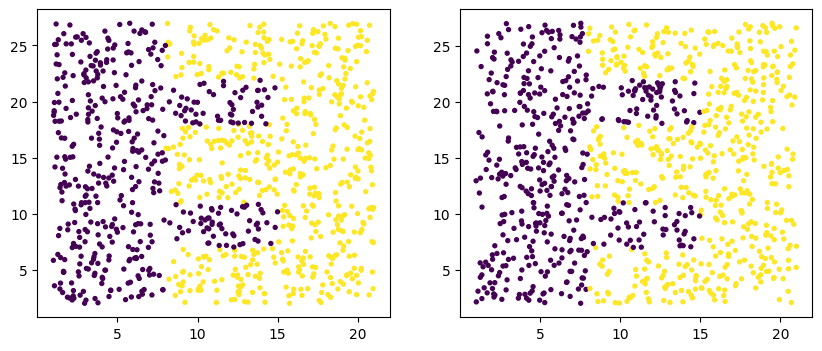

In [1]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd
hart = pd.read_csv('hart.dat', sep = '\s+').to_numpy()
X_train = hart[:1000, :2]; y_train = hart[:1000, 2]; X_test = hart[1000:, :2]; y_test = hart[1000:, 2]
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(*X_train.T, c=y_train, s=8); axs[1].scatter(*X_test.T, c=y_test, s=8);

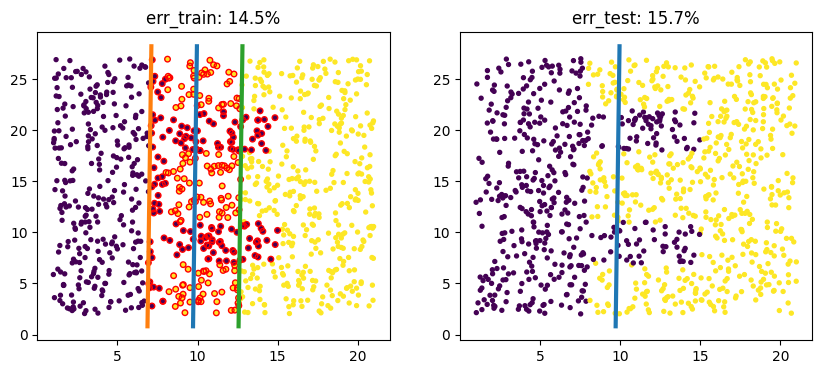

In [2]:
from sklearn import svm; from sklearn.metrics import accuracy_score
C = 1; clf = svm.SVC(C=C, kernel='linear').fit(X_train, y_train)
err_train = 1 - accuracy_score(y_train, clf.predict(X_train))
err_test = 1 - accuracy_score(y_test, clf.predict(X_test))
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w);
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title(f'err_train: {err_train:.1%}'); axs[0].scatter(*X_train.T, c=y_train, s=8);
x2 = np.linspace(*axs[0].get_ylim()); x1 = (-w[1]*x2 - w0)/w[0]
axs[0].plot(x1, x2, x1 - 1/w[0], x2, x1 + 1/w[0], x2, linewidth=3)
axs[0].scatter(*clf.support_vectors_.T, s=16, facecolors='none', edgecolors='r')
axs[1].set_title(f'err_test: {err_test:.1%}');   axs[1].scatter(*X_test.T, c=y_test, s=8)
axs[1].plot(x1, x2, linewidth=3);